In [1]:
include("../src/GaPSE.jl");
using DelimitedFiles, Plots

In [2]:
FILE_F_MAP = "../data/F_REFERENCE.txt"
FILE_PS = "../data/WideA_ZA_pk.dat"
FILE_BACKGROUND = "../data/WideA_ZA_background.dat"
#FILE_IS = "tab_xi.txt"

z_min = 0.05
z_max = 0.20
θ_max = π / 2.0
params = GaPSE.CosmoParams(z_min, z_max, θ_max;
  k_min = 1e-8, k_max = 10.0,
  Ω_b = 0.0489, Ω_cdm = 0.251020, h_0 = 0.70,
    N = 1024, fit_min = 1.0, fit_max= 6.0, con=true)
cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP)

GaPSE.parameters_used(stdout, cosmo)

# The following parameters were used for this computation: 
# CLASS Power Spectrum input file : "../data/WideA_ZA_pk.dat"
# F window function input file : "../data/F_REFERENCE.txt"
# CLASS Background input file: "../data/WideA_ZA_background.dat"
# 	 z_min = 0.05 	 z_max = 0.2
# 	 k_min = 1.0e-8 	 k_max = 10.0
# 	 h_0 = 0.7 	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
# 	 comoving s_min = 148.1920001343431 Mpc/h_0
# 	 comoving s_max = 571.7022420911966 Mpc/h_0
# 	 comoving s_eff = 435.37470960794167 Mpc/h_0
# 	 comoving z_eff = 0.15045636097417317 
# 	 Volume of the survey V_survey = 3.845366169354268e8
# 	 σ_0 = 18.584280735779384
# 	 σ_1 = 15.75556280411525
# 	 σ_2 = 101.06362214219054
# 	 σ_3 = 18.584280735779384
# 


In [3]:
GaPSE.print_map_int_on_mu(cosmo,
    "IntegratedGP_tests/xi_integratedgp.txt",
    "auto_integratedgp"; use_windows = false,
    N_χs = 100, enhancer = 1e10, use_my = false)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


I will use quadgk.

time needed for map_integral_on_mu for auto_integratedgp [in s] = 2.68951 


In [4]:
table = readdlm("IntegratedGP_tests/xi_integratedgp.txt", comments=true)
ss = convert(Vector{Float64}, table[:, 1]);
my_igps = convert(Vector{Float64}, table[:, 2]);

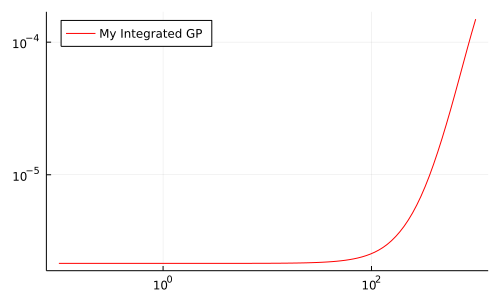

In [9]:
plot(ss, my_igps, xaxis=:log, yaxis=:log, lc=:red, size=(500, 300), 
    label="My Integrated GP", legend=:topleft)